In [49]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, rand_score, adjusted_rand_score, mutual_info_score

In [50]:
# Importing dataset 'iris.csv'
data = pd.read_csv('../datasets/iris.csv')

data.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [51]:
# Splitting the dataset into features and class names

# Features will influence the split
X = pd.DataFrame(data[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']])
X.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# print(X)
      
# Dataset will be clustered based on the variety, i.e., the class names   
y = pd.DataFrame(data['variety']).replace({'Setosa':0,'Versicolor':1,'Virginica':2})
# print(y)

Text(0.5, 1.0, 'Petal')

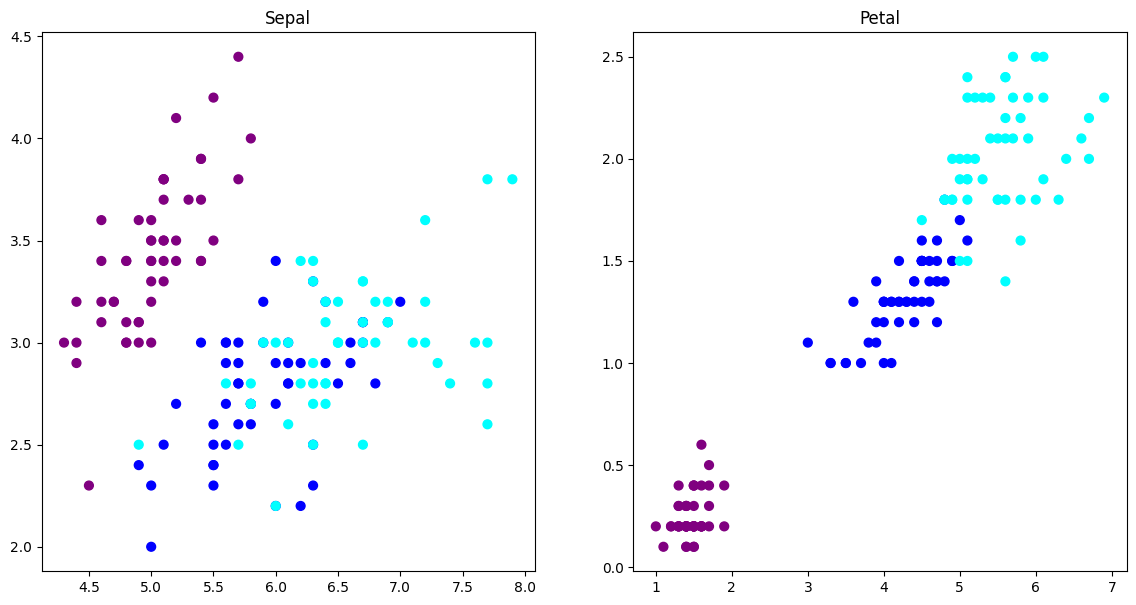

In [52]:
# Plot the clusters

# Set size of plot
plt.figure(figsize=(14,7))

# Create a colormap
colormap = np.array(['purple','blue','cyan'])

# Plot Sepal
plt.subplot(1,2,1)
plt.scatter(X.sepal_length,X.sepal_width,c=colormap[y.variety],s=40)
plt.title('Sepal')

# Plot Petal
plt.subplot(1,2,2)
plt.scatter(X.petal_length,X.petal_width,c=colormap[y.variety],s=40)
plt.title('Petal')

In [53]:
# Create model
model = KMeans(n_clusters=3, n_init='auto')
model.fit(X)
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Text(0, 0.5, 'petal width')

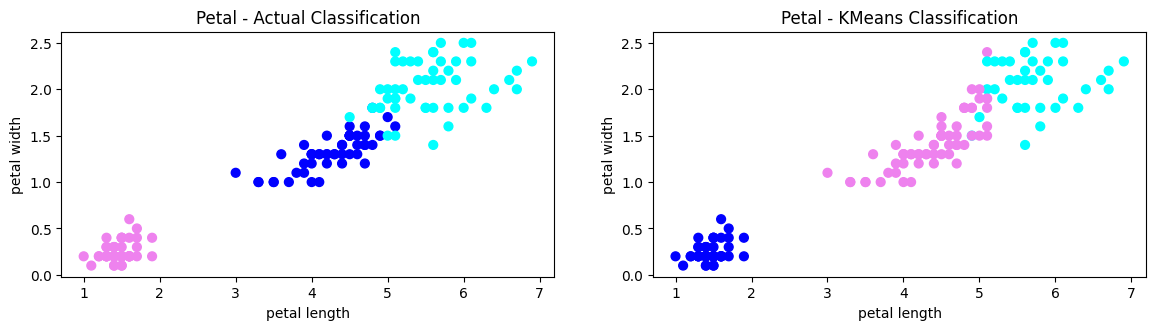

In [54]:
# Petal - Actual vs KMeans Model Classification

# Set size of plot
plt.figure(figsize=(14,7))

# Create a colormap
colormap = np.array(['violet','blue','cyan'])

# Plot actual classification
plt.subplot(2,2,1)
plt.scatter(X.petal_length,X.petal_width,c=colormap[y.variety],s=40)
plt.title('Petal - Actual Classification')
plt.xlabel('petal length')
plt.ylabel('petal width')

# Plot model's classification
plt.subplot(2,2,2)
plt.scatter(X.petal_length,X.petal_width,c=colormap[model.labels_],s=40)
plt.title('Petal - KMeans Classification')
plt.xlabel('petal length')
plt.ylabel('petal width')

Text(0.5, 0, 'sepal width')

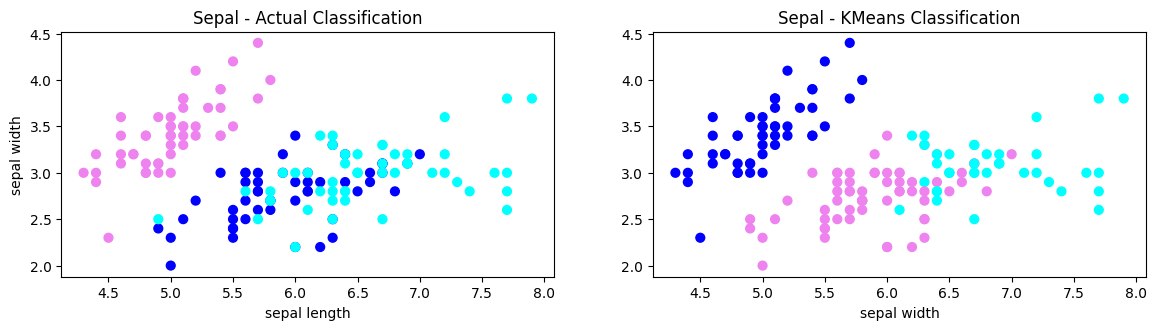

In [55]:
# Sepal - Actual v/s KMeans Model Classification

# Set size of plot 
plt.figure(figsize=(14,7))

# Plot actual classification
plt.subplot(2,2,3)
plt.scatter(X.sepal_length,X.sepal_width,c=colormap[y.variety],s=40)
plt.title('Sepal - Actual Classification')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

# Plot model's classification
plt.subplot(2,2,4)
plt.scatter(X.sepal_length,X.sepal_width,c=colormap[model.labels_],s=40)
plt.title('Sepal - KMeans Classification')
plt.xlabel('sepal length')
plt.xlabel('sepal width')


In [56]:
# Silhouette score measures separation distance between clusters
print("The silhouette score of the model is",silhouette_score(X,model.labels_,metric='euclidean'))

The silhouette score of the model is 0.5528190123564102


In [57]:
# Rand index is a measure of similarity between clusters 
print("The rand score of the model is",rand_score(y.variety,model.labels_))

The rand score of the model is 0.8797315436241611


In [58]:
# Adjusted Rand index takes random chance (that causes some objects to occupy the same clusters) into consideration
print("The adjusted rand score of the model is",adjusted_rand_score(y.variety,model.labels_))

The adjusted rand score of the model is 0.7302382722834697


In [59]:
# Mutual Info score is a measure of similarity between clusters
print("The mutual info score of the model is",mutual_info_score(y.variety, model.labels_))

The mutual info score of the model is 0.8255910976103357
